## Itération sur les éléments d'un array

In [3]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

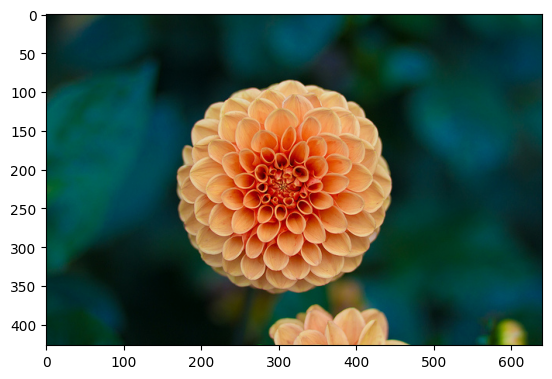

In [4]:
flower = load_sample_image('flower.jpg')
plt.imshow(flower)

In [5]:
flower

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], shape=(427, 640, 3), dtype=uint8)

In [7]:
flower[0,0]             # ceci nous donne le contenu du 1er pixel [2, 19 , 13], rouge a l'intensité = 2,  bleu = 19, vert = 13  

array([ 2, 19, 13], dtype=uint8)

In [8]:
np.mean(flower[0,0])        # pour ce pixel en particulier pour avoir une image en noir et blanc il faut calculer la moyenne des trois couleurs

np.float64(11.333333333333334)

In [10]:
# pour appliquer cette moyenne a chacun des pixels sur votre image on utilise la boucle for
for ligne in flower:
    for pixel in ligne:
        print(pixel)
        break
    break       # ON obtient les valeurs de notre 1er pixel

[ 2 19 13]


In [12]:
for ligne in flower:
    for pixel in ligne:
        moyenne = np.mean(pixel)
        moyenne_3d = np.stack([moyenne, moyenne, moyenne])
        break
    break

In [16]:
output = []
for ligne in flower:
    for pixel in ligne:
        moyenne = np.mean(pixel)
        moyenne_3d = np.stack([moyenne, moyenne, moyenne])
        output.append(moyenne_3d)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.6666666666666665..220.0].


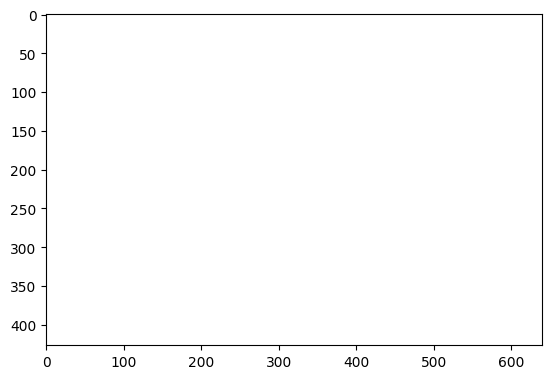

In [19]:
image_noir_blanc = np.array(output).reshape(flower.shape)
plt.imshow(image_noir_blanc)                    # on a ceci a cause du fait que les moyenne et valeur sont des float, transformons nos valeurs en int

In [20]:
output = []
for ligne in flower:
    for pixel in ligne:
        moyenne = int (np.mean(pixel))
        moyenne_3d = np.stack([moyenne, moyenne, moyenne])
        output.append(moyenne_3d)

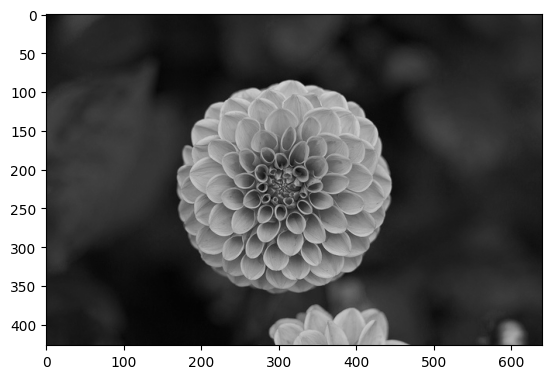

In [21]:
image_noir_blanc = np.array(output).reshape(flower.shape)
plt.imshow(image_noir_blanc) 

In [ ]:
# Création d'un array de dimensions 32x32x3   (lignes x colonnes x canaux)
X = np.zeros(shape = (32, 32, 3))
 
# Itération sur la première dimension de l'array (les lignes)
for ligne in X:
    
    # Ici une ligne consiste en une matrice de 32 colonnes et 3 lignes
 
    # Itération sur la deuxième dimension de l'array (les pixels de la ligne)
    for pixel in ligne:
        # ici, un pixel est un vecteur de 3 valeurs (R, G, B)
        # Itération sur la troisième dimension de l'array (les canaux du pixel)
        for canal in pixel:
            # Ici canal est un nombre entier correspondant à l'intensité de la couleur R, G ou B
            # Ici on peut manipuler chaque pixel séparément
            ...
            ...


Pour revenir à notre étude de cas, notre code sera

# Nous créons une variable qui nous servira à stocker les résultats intermédiaires
out = []
 
# Itération sur la 1ere dimension pour extraire chaque ligne
for ligne in flower:
    # Itération sur la deuxième dimension de l'array (les pixels de la ligne)
    for pixel in ligne:
        # Comme on cherche à créer une moyenne sur les 3 canaux, il nous est inutile
        # de créer une itération sur les valeurs des canaux
 
        # On calcule d'abord des intensités pour le pixel
        moyenne_pixel = np.mean(pixel)
        # On la transforme ensuite en nombre entier (les images sont une matrice de nombres entiers)
        moyenne_pixel_entier = int(moyenne_pixel)
 
        # Ensuite on crée un array de dimension (3,)
        moyenne_3d = np.stack([moyenne_pixel_entier, moyenne_pixel_entier, moyenne_pixel_entier])
        # Nous avons maintenant la valeur de tous les canaux pour ce pixel. Ajoutons le résultat à notre variable out
        out.append(moyenne_3d)
 
# A la fin des itérations, on se retrouve avec une liste de longeur 273280
# Chaque élément de cette liste, contient un array de dimension 3
# Il faut la redimensionner pour qu'elle ait la meme "shape" que flower.  
# Pour cela, d'abord la transformer en array et ensuite utiliser la fonction reshape
image_nb = np.array(out).reshape(flower.shape)
 
# Finalement on affiche l'image
plt.imshow(image_nb)

> Code bonus pour effectuer la meme operation mais plus rapidement


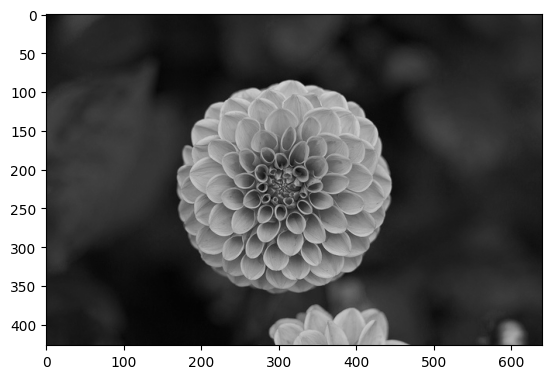

In [22]:
moyenne = np.mean(flower, axis = 2, dtype = int)
image_nb = np.repeat(moyenne, 3).reshape(flower.shape)
plt.imshow(image_nb)

In [ ]:
Les boucles for et while dans Python tendent à prendre plus de temps pour se terminer. On ene sent pas la difference sur une 10aines de lignes mais pour des donnees consequentes le code prendra plus de temps.
    reconsiderons le code:

out = []
for ligne in flower:
    # Itération sur la deuxième dimension de l'array (les pixels de la ligne)
 for pixel in ligne:
        # Itération sur la troisième dimension de l'array (les canaux du pixel)
        moyenne = np.array(int(np.mean(pixel)))
        moyenne_3d = np.stack([moyenne, moyenne, moyenne])
        out.append(moyenne_3d)
image_nb = np.array(out).reshape(flower.shape)
# On n'affiche pas l'image

Avec la boucle for le code prend enormement plus de temps pour donner le resultat
Si, maintenant, on n utilisait que des fonctions numpy pour arriver au même résultat (voire la documentation des fonctions np.mean et np.repeat)

moyenne = np.mean(flower, axis=2, dtype=int)
moyenne_3d = moyenne.repeat(3)
image_nb = moyenne_3d.reshape(flower.shape)

ce code est le meilleur il but est de trouver comment fonctionne differentes fonction numpy 
